We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-25 10:08:11--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:2200:1d:d83a:40c0:93a1, 2600:9000:21c7:6400:1d:d83a:40c0:93a1, 2600:9000:21c7:3600:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:2200:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [4]:
df.count()

dateRep                    19037
day                        19037
month                      19037
year                       19037
cases                      19037
deaths                     19037
countriesAndTerritories    19037
geoId                      19037
countryterritoryCode       18845
popData2018                18781
continentExp               19037
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-20   0.0  873.0  581.0  0.0  0.0   1.0  218.0  2.0  438.0  78.0  ...   
2020-05-21   1.0  941.0  492.0  0.0  0.0  15.0  230.0  2.0  474.0  18.0  ...   
2020-05-22   0.0  894.0  531.0  0.0  0.0   5.0  335.0  6.0  648.0  57.0  ...   
2020-05-23   0.0  994.0  540.0  0.0  0.0  12.0  322.0  2.0  718.0  29.0  ...   
2020-05-24   0.0  812.0  782.0  0.0  0.0   8.0  374.0  0.0  704.0  46.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-20    0.0  0.0  0.0  0.0  0.0  0.0  8.0  26.0  0.0  0.0  
2020-05-21    0.0  0.0  0.0  0.0  0.0  0.0  1.0  27.0  0.0  0.0  
2020-05-22    0.0  0.0  0.0  0.0  0.0  0.0  4.0  30.0  0.0  0.0  
2020-05-23    0.0  0.0  0.0  0.0  0.0  0.0  0.0  28.0  0.0  0.0  
2020-05-24    0.0  0.0  0.0  0.0  0.0  0.0  6.0  10.0  0.0  0.0  

[146 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-05-20   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-21   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-22   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-23   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-24   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-05-20 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-21 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-22 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-23 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-24 NaN  NaN NaN NaN NaN NaN NaN  

[511 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since the earliest date in the dataframe.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    511.000000
mean     255.000000
std      147.657261
min        0.000000
25%      127.500000
50%      255.000000
75%      382.500000
max      510.000000
Name: daynum, dtype: float64

In [8]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP Res  0.296 at 108% of   15164 start 2020-04-04 peak 2020-04-17 floor 2020-05-12 beta 10.041 mu 107.572
RU Res  0.590 at  44% of  697234 start 2020-04-01 peak 2020-05-19 floor 2020-09-27 beta 24.652 mu 139.801
US Res  6.891 at  87% of 1785592 start 2020-03-14 peak 2020-04-21 floor 2020-08-05 beta 18.577 mu 111.301
BR Res  2.704 at  17% of 1762879 start 2020-03-28 peak 2020-06-21 floor 2021-02-04 beta 43.211 mu 172.169
AT Res 57.390 at  99% of   16366 start 2020-03-07 peak 2020-03-30 floor 2020-05-31 beta 12.272 mu  89.412
CH Res  2.270 at  99% of   30764 start 2020-03-07 peak 2020-03-30 floor 2020-06-04 beta 11.304 mu  89.756
DE Res  5.286 at  98% of  180523 start 2020-03-09 peak 2020-04-05 floor 2020-06-14 beta 13.858 mu  95.202
IT Res  1.238 at  96% of  237033 start 2020-02-29 peak 2020-04-02 floor 2020-07-03 beta 16.813 mu  92.328
ES Res  5.930 at  98% of  236787 start 2020-03-06 peak 2020-04-02 floor 2020-06-20 beta 13.207 mu  92.400
PT Res  8.000 at  96% of   31021 start 2020-03

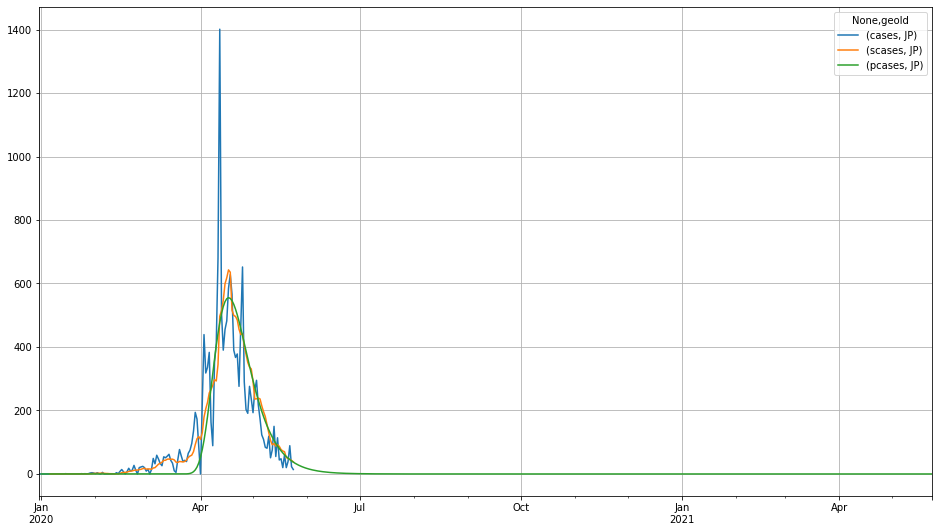

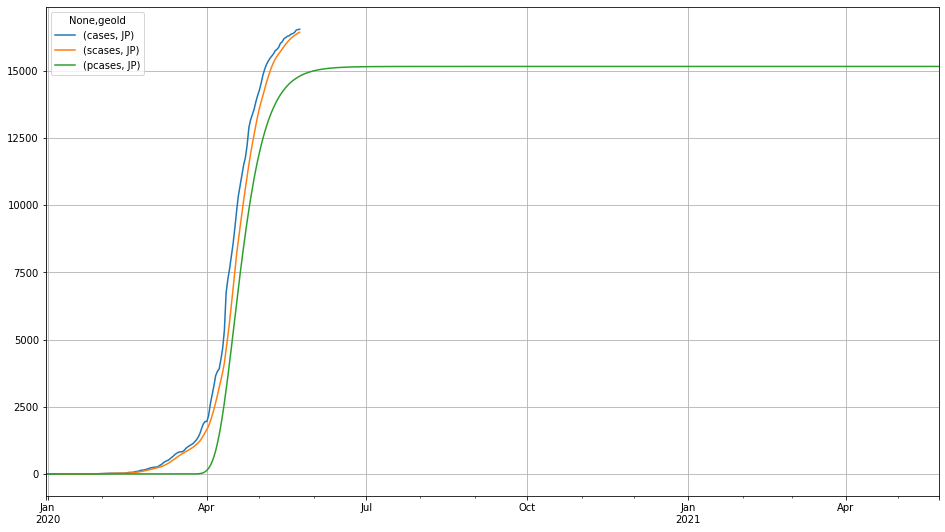

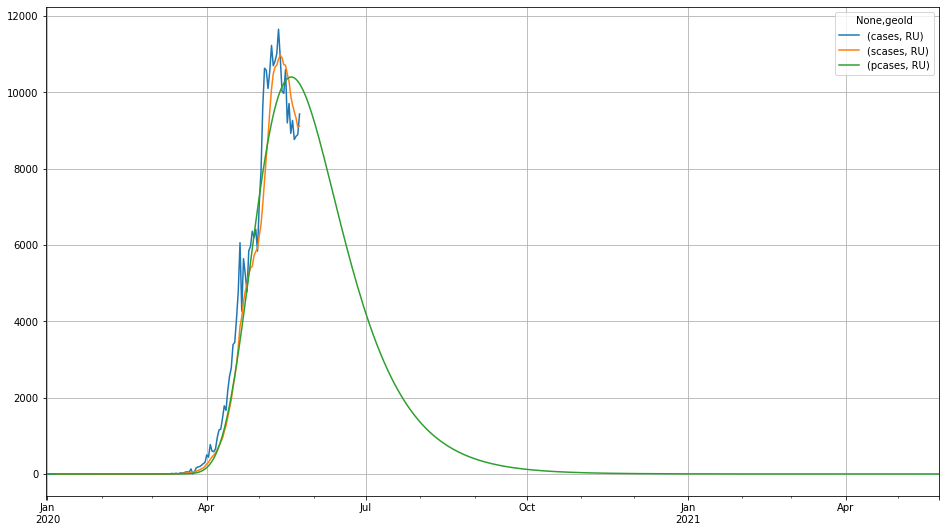

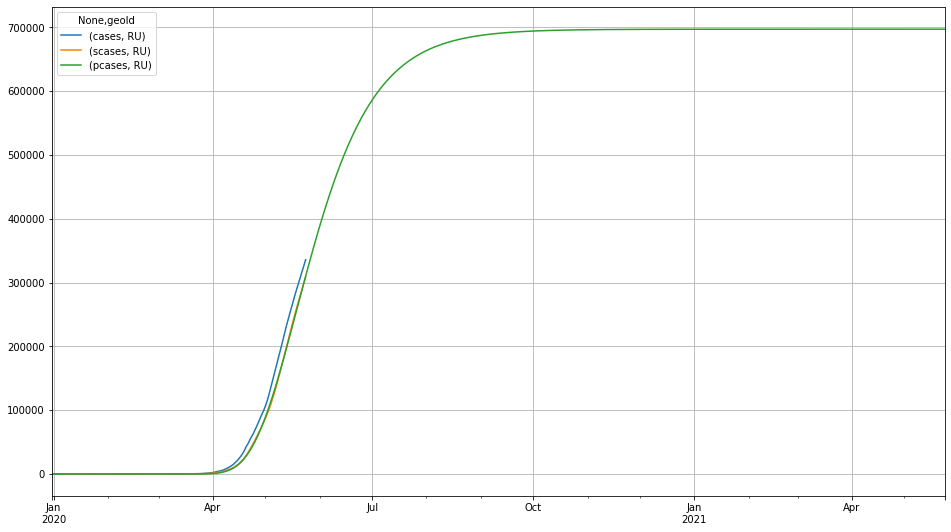

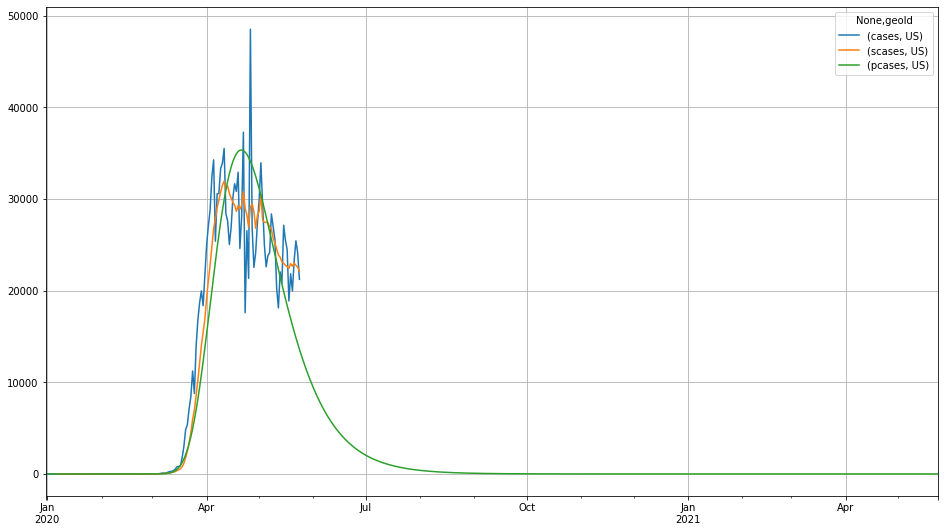

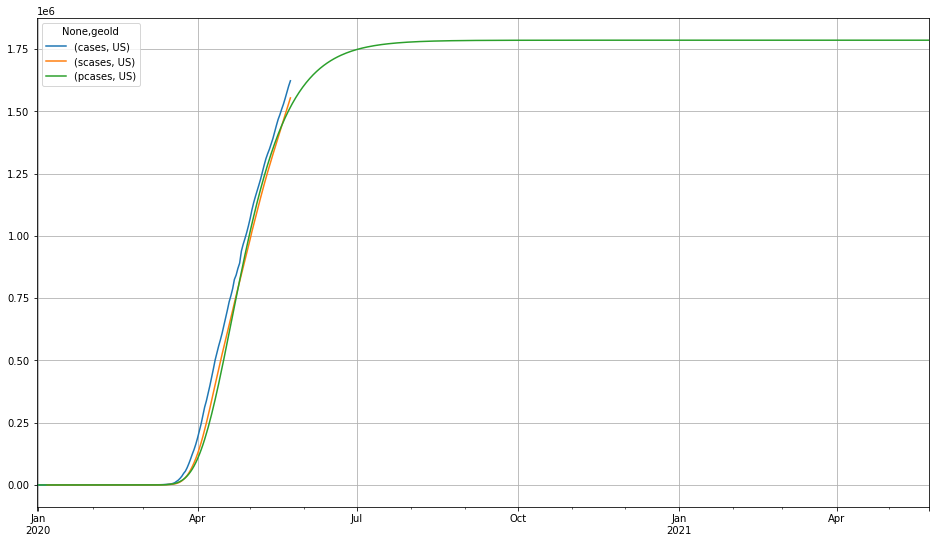

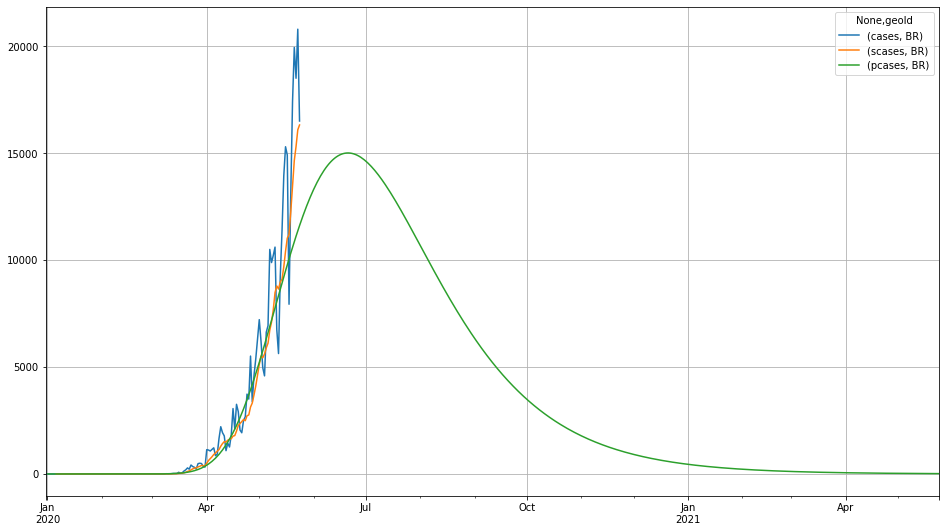

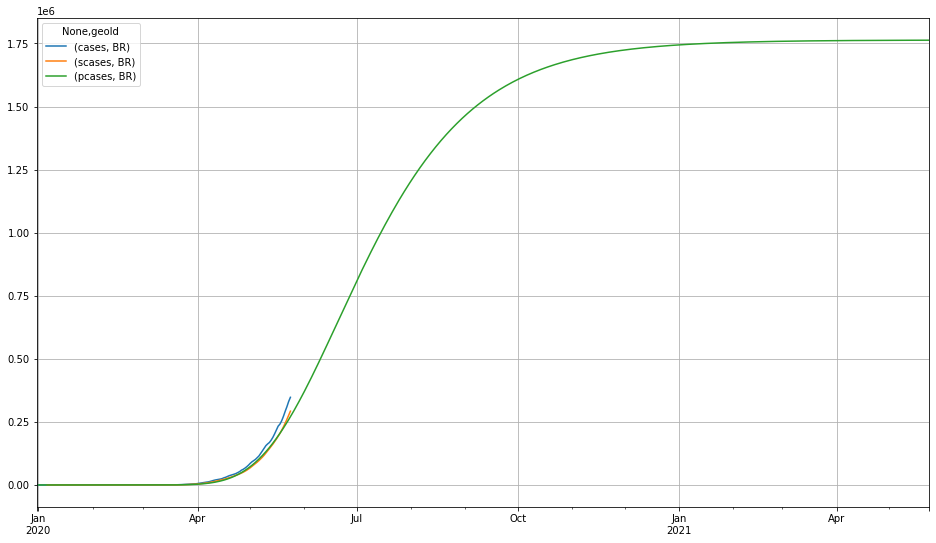

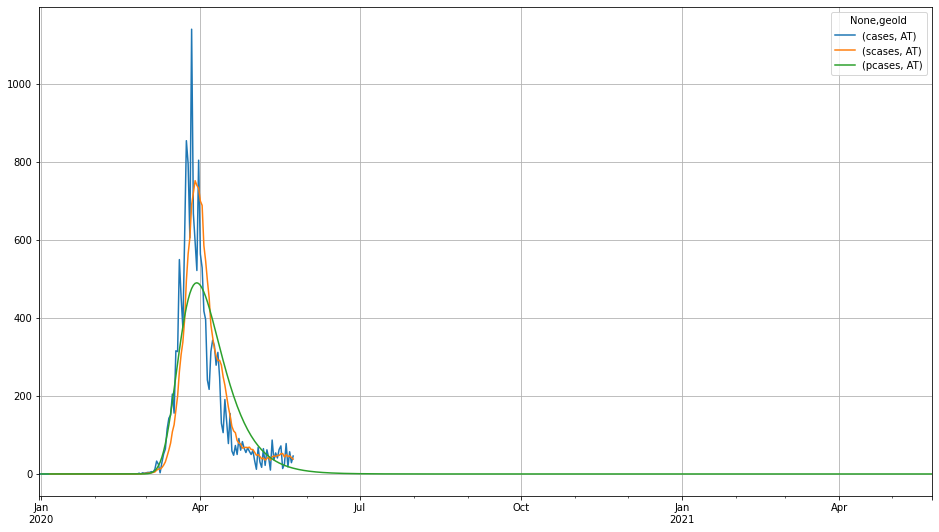

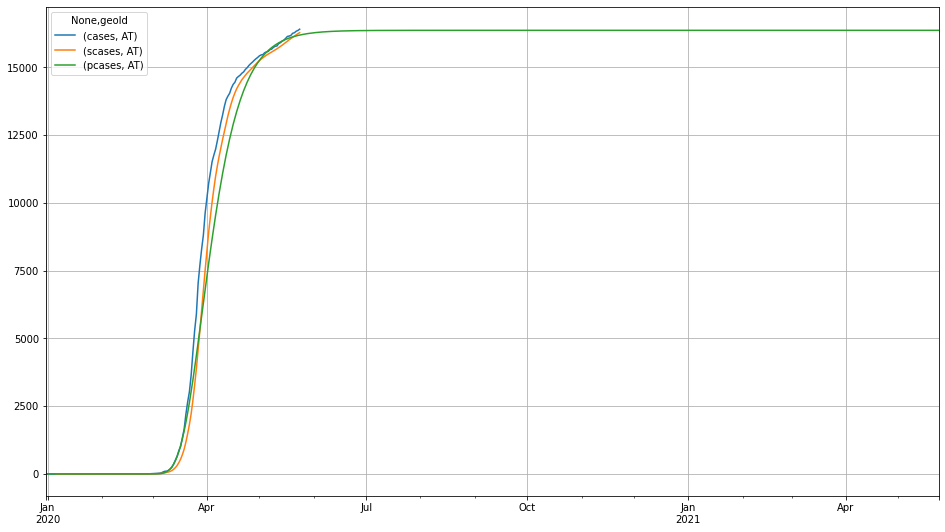

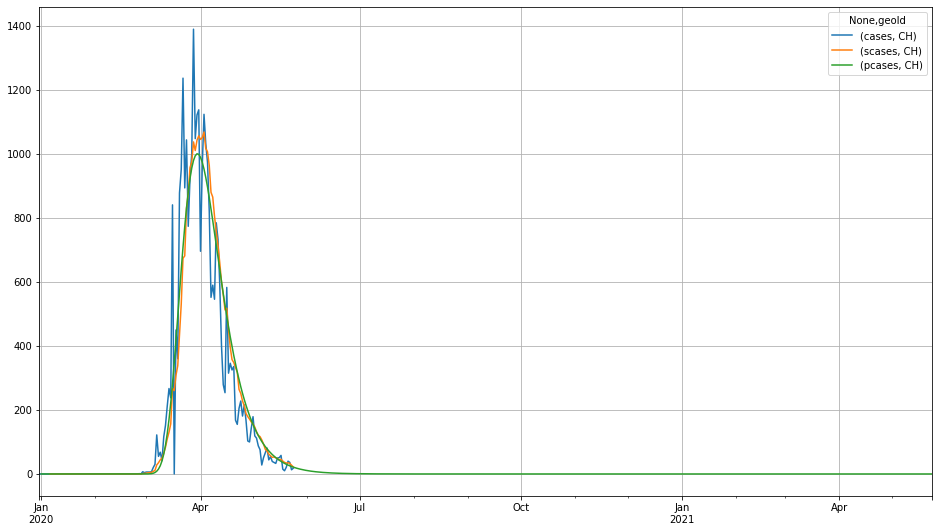

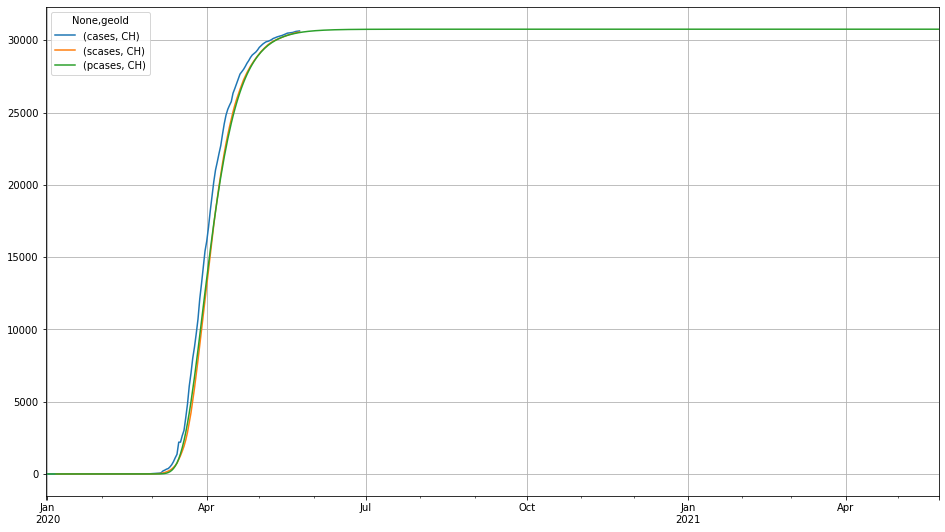

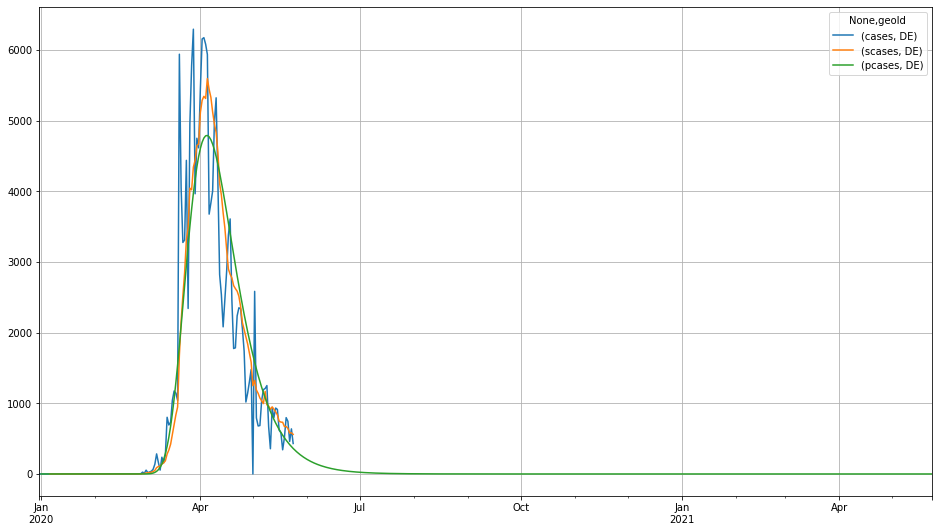

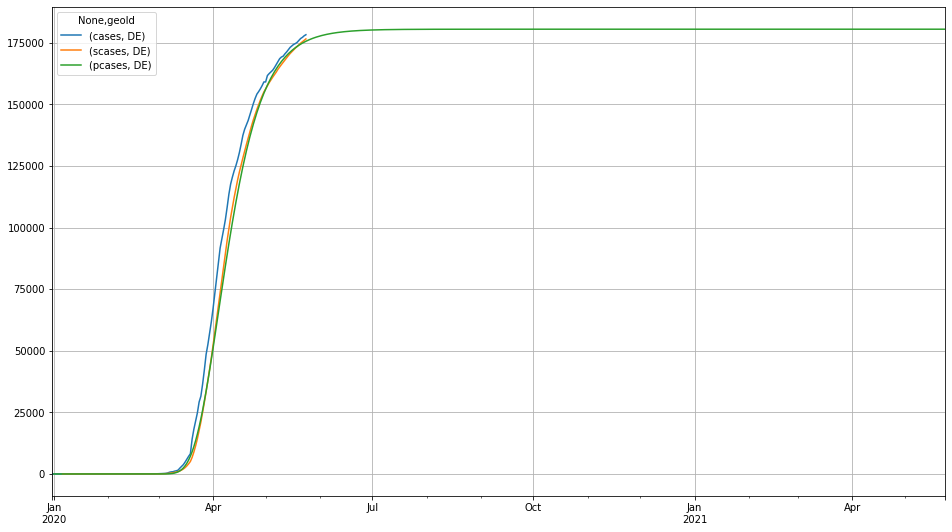

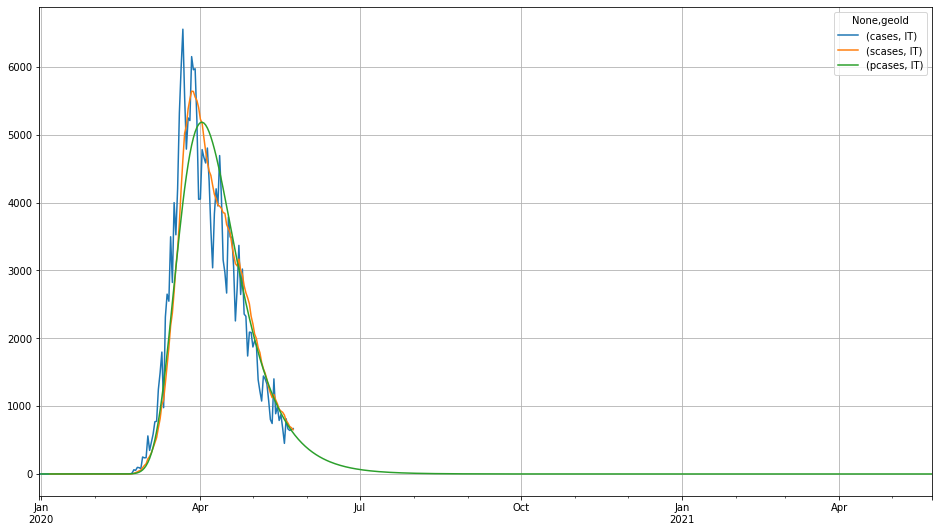

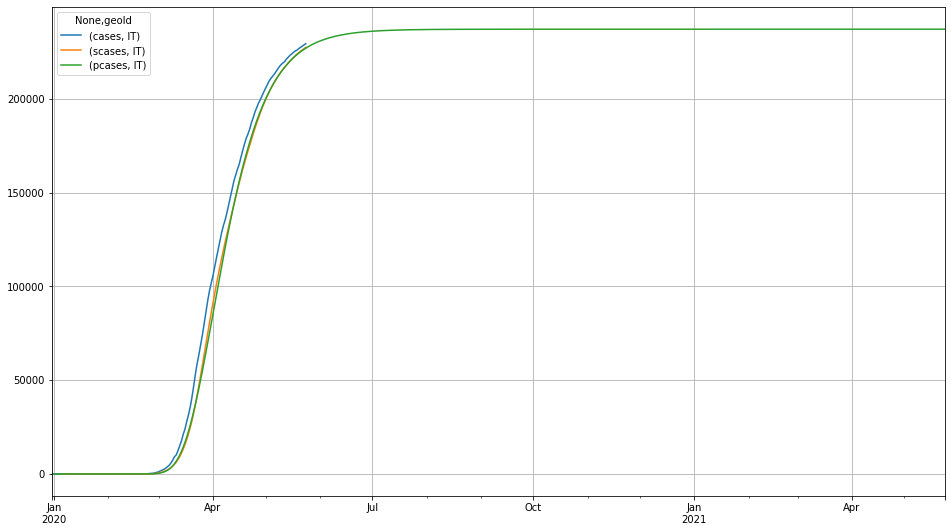

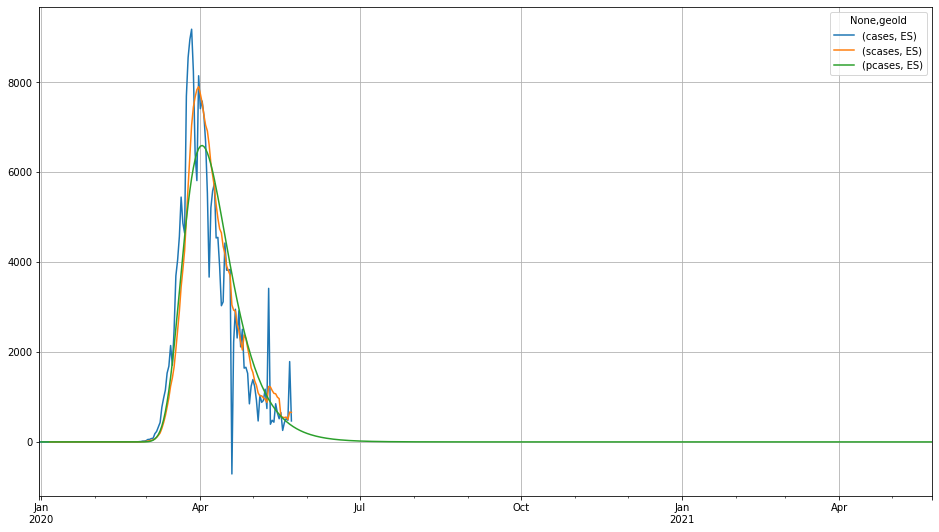

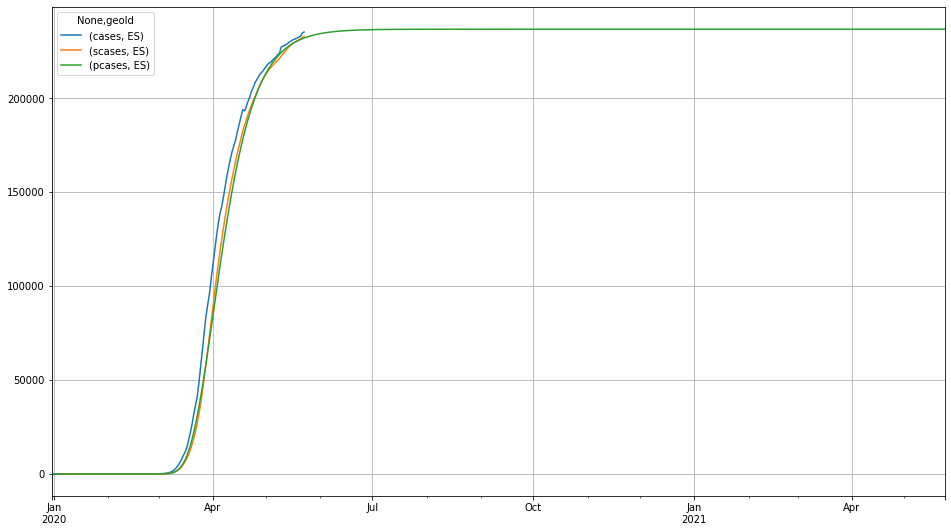

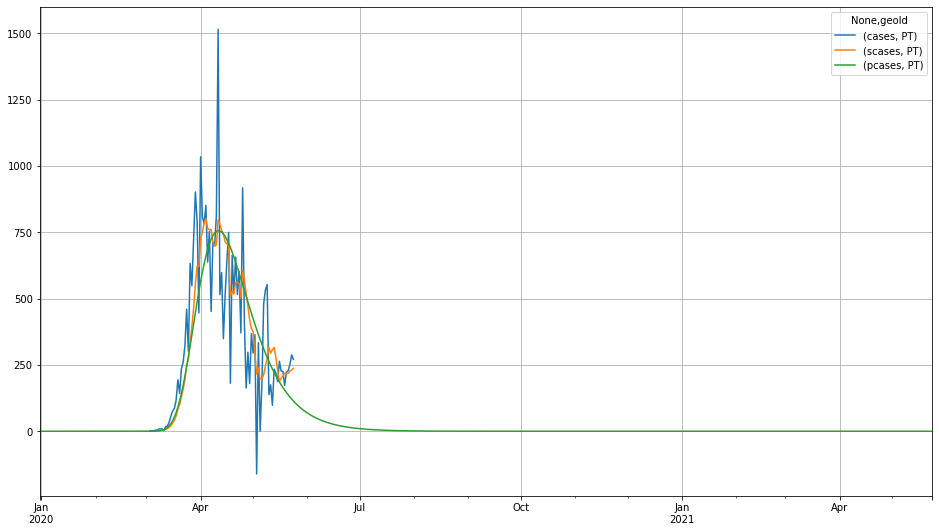

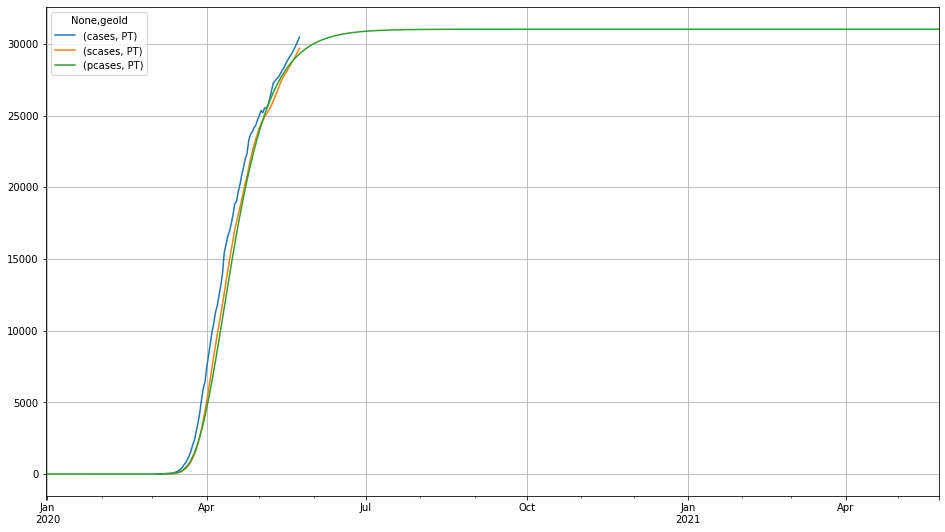

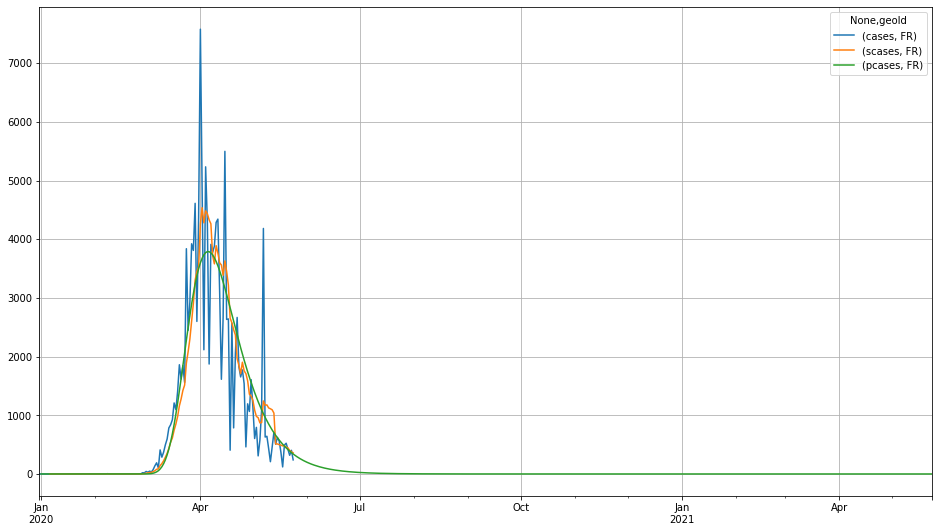

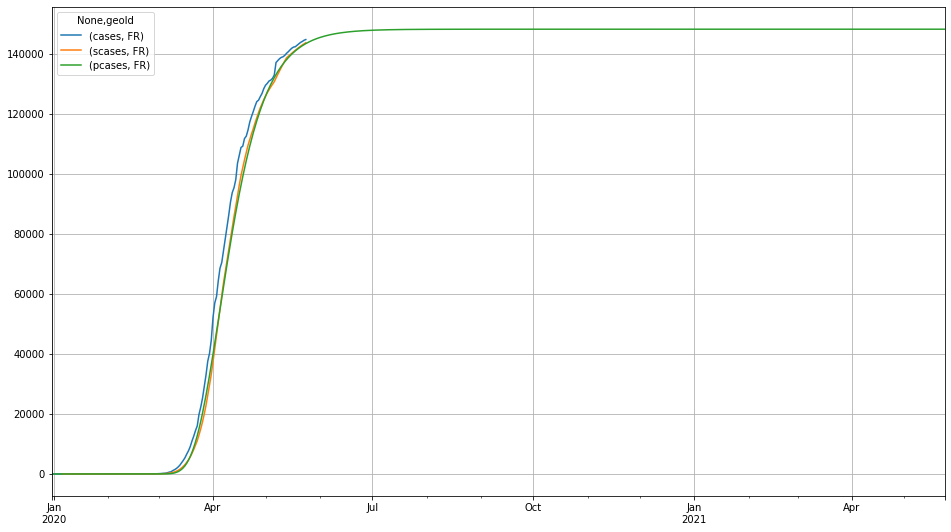

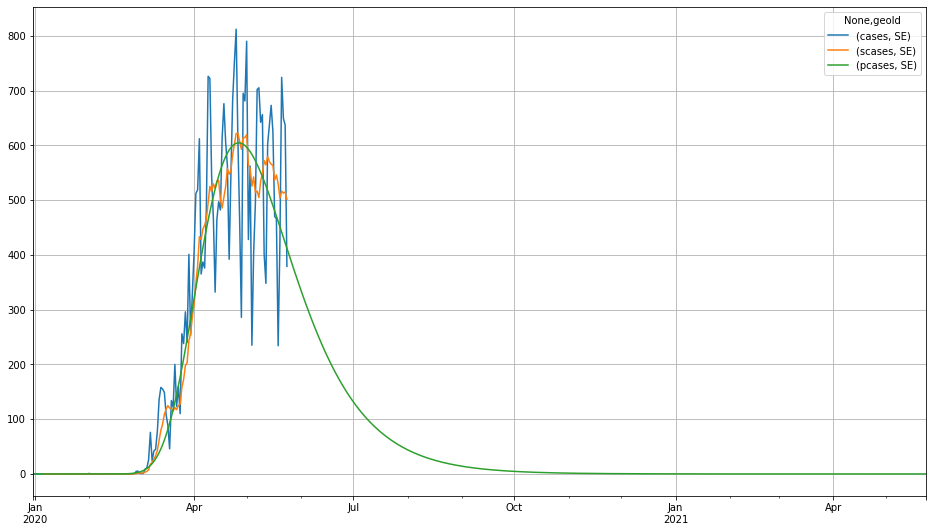

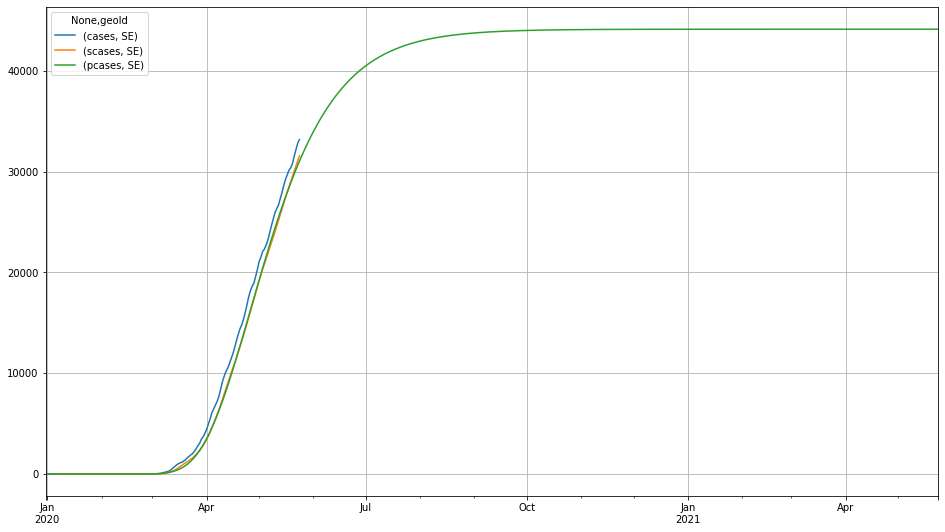

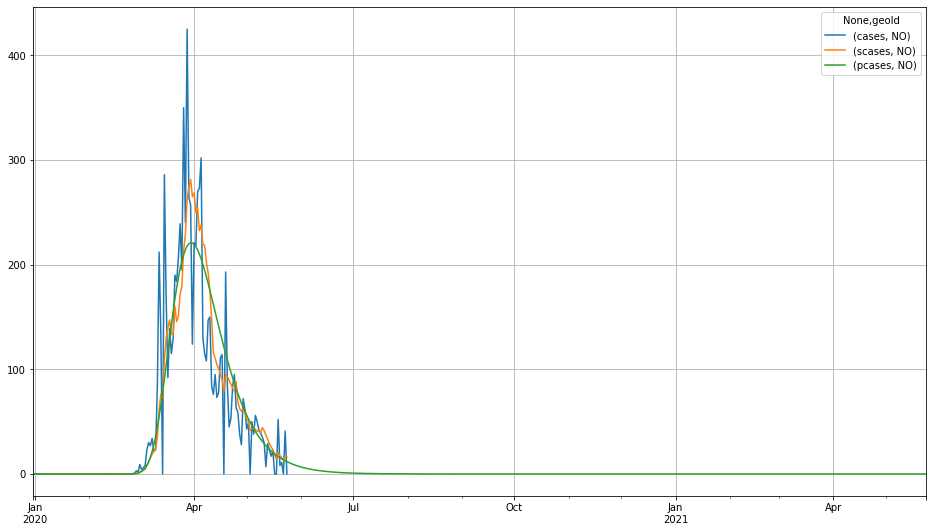

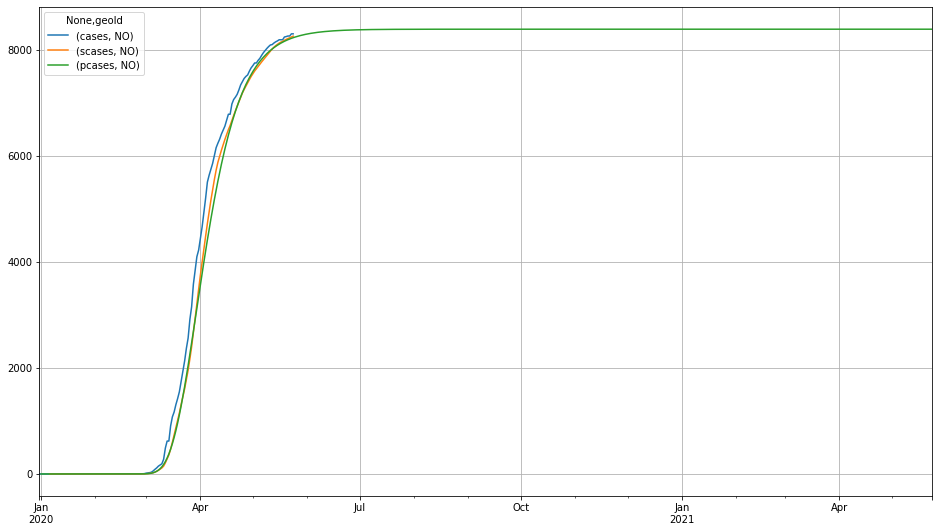

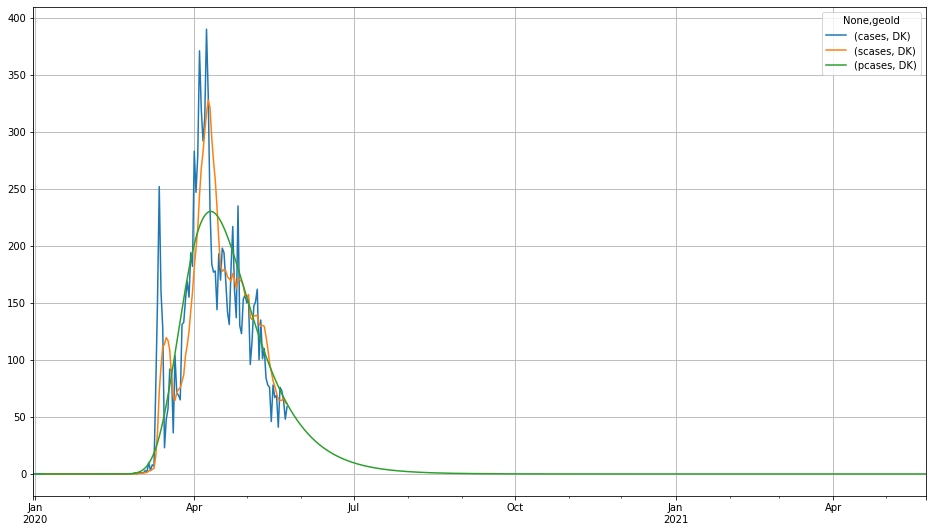

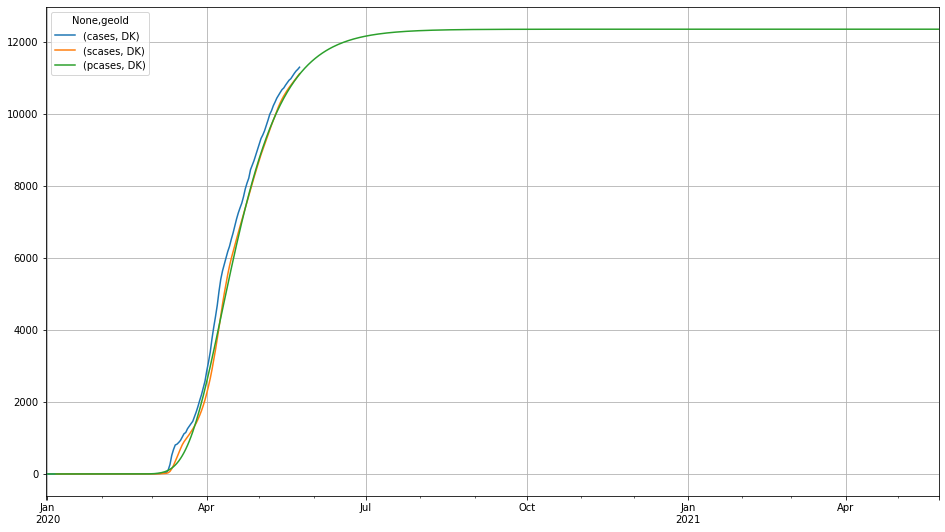

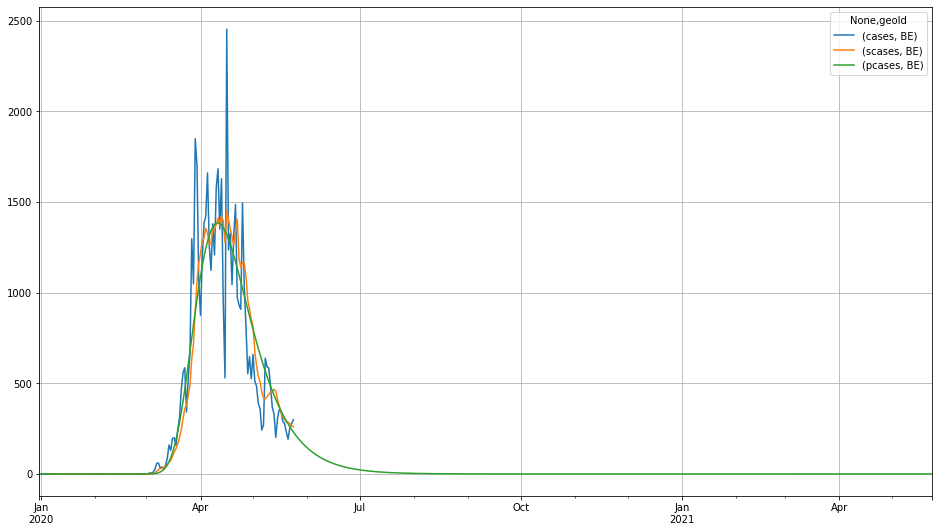

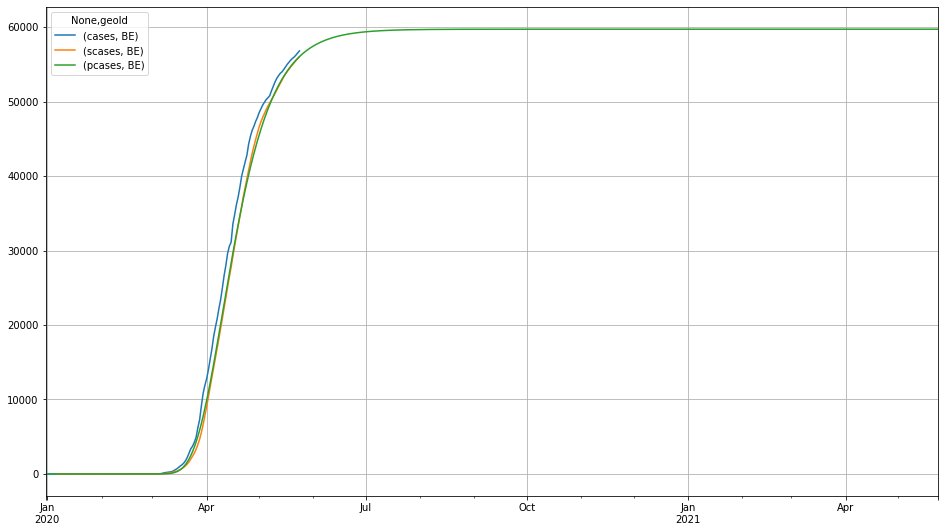

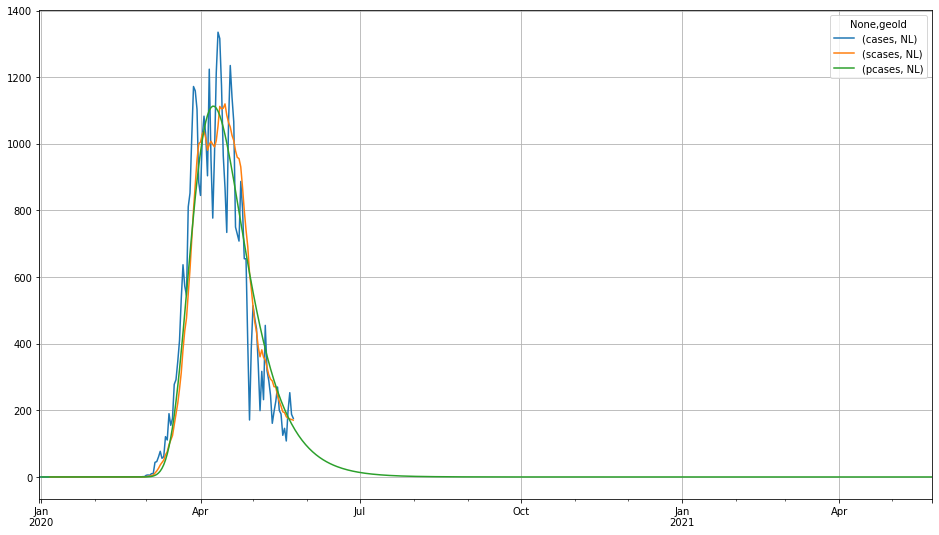

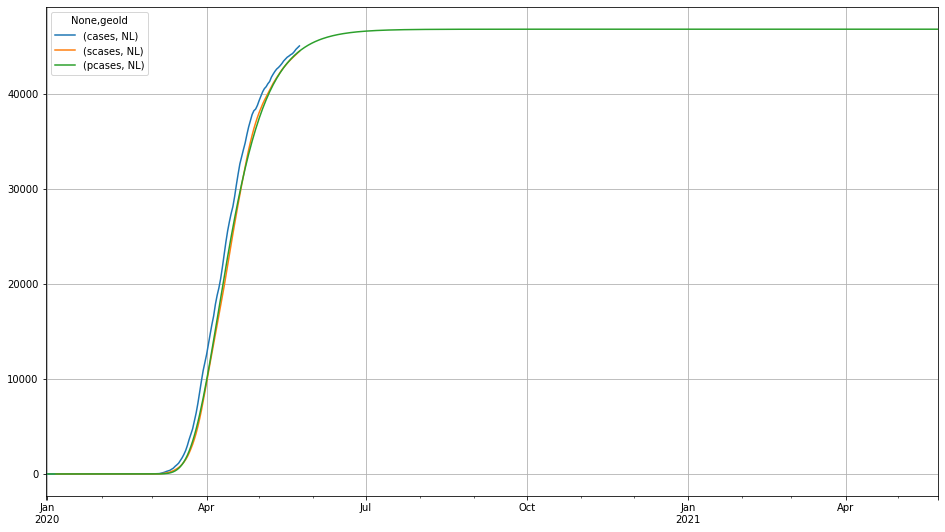

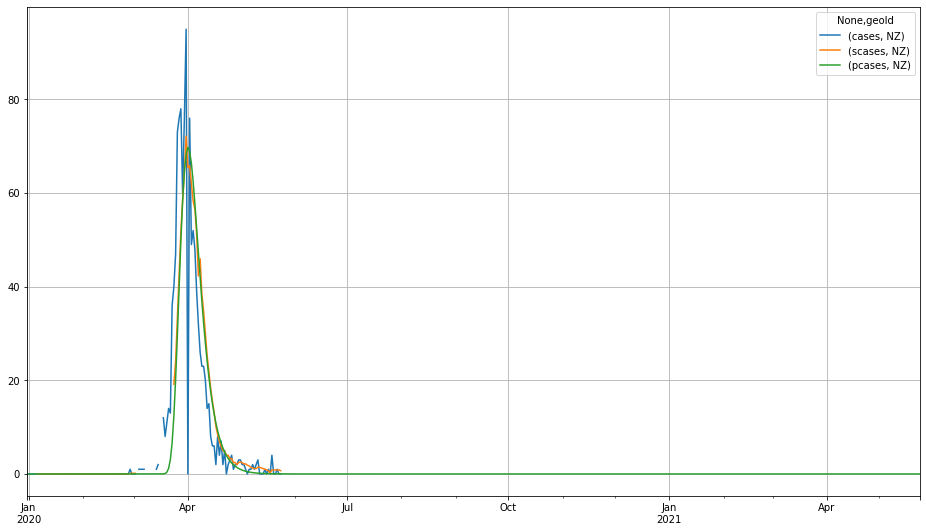

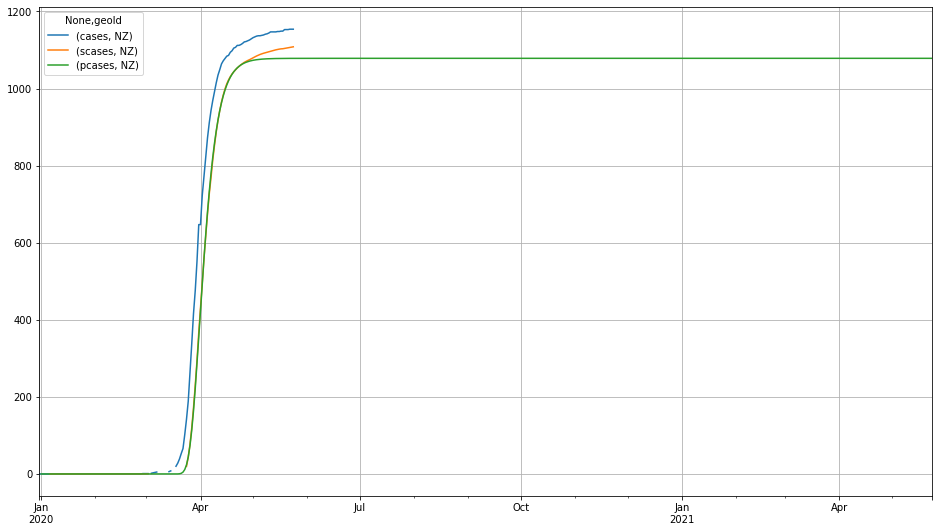

In [15]:
#countries = np.sort(df['geoId'].unique())
countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE', 'NO', 'DK', 'BE', 'NL', 'NZ']

showplots = True

df_out = pd.DataFrame({
    'cname':np.nan,\
    'iso3':np.nan,\
    'ccont':np.nan,\
    'popdata':np.nan,\
    'res':np.nan,\
    'progress':np.nan,\
    'final':np.nan,\
    'start':np.nan,\
    'peak':np.nan,\
    'floor':np.nan,\
    'beta':np.nan,\
    'mu':np.nan},\
    index=countries)

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

def fitres(progress):
    global df_pred, fit
    
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress[0]

    if len(df_pred) > 10:
        df_pred['linear'] = - np.log(- np.log(df_pred[df_pred['scaled'] < 1]['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        return(fit[1][0] / fit[0][0])
    else:
        return np.nan

from scipy.optimize import minimize

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
    df_pred = pd.DataFrame(
        {'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    cname   = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    iso3    = df[df['geoId'] == country]['countryterritoryCode'].iloc[0]
    ccont   = df[df['geoId'] == country]['continentExp'].iloc[0]
    popdata = df[df['geoId'] == country]['popData2018'].iloc[0]

    mincases = popdata / 1e6
    numcases = df_pred[measure].sum()
    
    df_pred = df_pred[df_pred[measure] > mincases]
    
    if len(df_pred) > 10:
        df_pred['cumul'] = df_pred[measure].cumsum()
        
        optim = minimize(fitres, [0.8], method='SLSQP', bounds=[(0.1, 2)])
        progress = optim.x[0]
        
        df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(
            fit[0], df_geo['daynum']))) * numcases / progress
        df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
        
        slope = fit[0][0]
        intercept = fit[0][1]
        beta = 1 / slope
        mu = - intercept * beta
        
        peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index > peak)].index.min()
        start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index < peak)].index.min()
        final = df_geo[pmeasure][country].cumsum().max()
        
        df_out.loc[country] = [cname, iso3, ccont, popdata, optim.fun, progress, final, start.date(), peak.date(), floor.date(), beta, mu]
        print('{} Res {:6.3f} at {:3.0f}% of {:7.0f} start {} peak {} floor {} beta {:6.3f} mu {:7.3f}'.format(
            country, optim.fun, progress * 100, final, start.date(), peak.date(), floor.date(), beta, mu))
        
        if showplots:
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
                figsize=(16, 9), grid=True)
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
                figsize=(16, 9), grid=True)
    else:
        df_out.loc[country] = [cname, iso3, ccont, popdata, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

Check the output frame assigning the index name.

In [16]:
df_out.index.name = 'iso2'
df_out

,cname,iso3,ccont,popdata,res,progress,final,start,peak,floor,beta,mu
iso2,,,,,,,,,,,,
JP,Japan,JPN,Asia,126529100.0,0.295558,1.084130,1.516397e+04,2020-04-04,2020-04-17,2020-05-12,10.040806,107.572113
RU,Russia,RUS,Europe,144478050.0,0.590013,0.442761,6.972344e+05,2020-04-01,2020-05-19,2020-09-27,24.652180,139.801043
US,United_States_of_America,USA,America,327167434.0,6.891448,0.870233,1.785592e+06,2020-03-14,2020-04-21,2020-08-05,18.576761,111.301253
BR,Brazil,BRA,America,209469333.0,2.704480,0.165805,1.762879e+06,2020-03-28,2020-06-21,2021-02-04,43.211032,172.169065
AT,Austria,AUT,Europe,8847037.0,57.390149,0.994795,1.636589e+04,2020-03-07,2020-03-30,2020-05-31,12.272151,89.411554
CH,Switzerland,CHE,Europe,8516543.0,2.270152,0.993771,3.076378e+04,2020-03-07,2020-03-30,2020-06-04,11.303759,89.755781
DE,Germany,DEU,Europe,82927922.0,5.286003,0.978116,1.805234e+05,2020-03-09,2020-04-05,2020-06-14,13.857836,95.201677
IT,Italy,ITA,Europe,60431283.0,1.238329,0.959105,2.370327e+05,2020-02-29,2020-04-02,2020-07-03,16.812534,92.327956
ES,Spain,ESP,Europe,46723749.0,5.930091,0.983826,2.367869e+05,2020-03-06,2020-04-02,2020-06-20,13.206863,92.400015


Write out the values per country, discarding countries with progress below 0.101.

In [17]:
df_out[df_out['progress'] > 0.101].to_csv("zzprogress.csv")

Keep exploring! Stay home, wash your hands, keep your distance.